<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isna().sum()
})
print(summary)

                    Data Type  Non-Null Count  Missing Values
ResponseId              int64           65437               0
MainBranch             object           65437               0
Age                    object           65437               0
Employment             object           65437               0
RemoteWork             object           54806           10631
...                       ...             ...             ...
JobSatPoints_11       float64           29445           35992
SurveyLength           object           56182            9255
SurveyEase             object           56238            9199
ConvertedCompYearly   float64           23435           42002
JobSat                float64           29126           36311

[114 rows x 3 columns]


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [15]:
# Write your code here

# missing values
missing_country_values = df['Country'].isna().sum()
print(f"Missing values in 'Country' column: {missing_country_values}")

# Check if there are any leading or trailing spaces
df['Country'] = df['Country'].str.strip()  

# unique entries
unique_countries = df['Country'].unique()
print(f"Unique entries in 'Country' column:\n{unique_countries}")

Missing values in 'Country' column: 6507
Unique entries in 'Country' column:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Lux

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [22]:
## Write your code here
edlevel_mapping = {
    'Primary/elementary school': 'Primary/Elementary School',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor\'s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master\'s Degree',
    'Some college/university study without earning a degree': 'Some College/University Study',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary School',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional Degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Something else': 'Other',
}

# standardise column
df['EdLevel'] = df['EdLevel'].map(edlevel_mapping).fillna(df['EdLevel'])

# display unique values
print(df['EdLevel'].unique())

['Primary/Elementary School' "Bachelor's Degree" "Master's Degree"
 'Some College/University Study' 'Secondary School' 'Professional Degree'
 'Associate Degree' 'Other' nan]


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [23]:
## Write your code here
df_encoded = pd.get_dummies(df, columns=['Employment'], drop_first=True) 
print(df_encoded.head())

   ResponseId                      MainBranch                 Age RemoteWork  \
0           1  I am a developer by profession  Under 18 years old     Remote   
1           2  I am a developer by profession     35-44 years old     Remote   
2           3  I am a developer by profession     45-54 years old     Remote   
3           4           I am learning to code     18-24 years old        NaN   
4           5  I am a developer by profession     18-24 years old        NaN   

    Check                                   CodingActivities  \
0  Apples                                              Hobby   
1  Apples  Hobby;Contribute to open-source projects;Other...   
2  Apples  Hobby;Contribute to open-source projects;Other...   
3  Apples                                                NaN   
4  Apples                                                NaN   

                         EdLevel  \
0      Primary/Elementary School   
1              Bachelor's Degree   
2                Master's 

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [24]:
## Write your code here
missing_values = df.isna().sum() 
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values_sorted)

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [25]:
## Write your code here
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns  
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
print(df[numerical_cols].isna().sum())

ResponseId             0
CompTotal              0
WorkExp                0
JobSatPoints_1         0
JobSatPoints_4         0
JobSatPoints_5         0
JobSatPoints_6         0
JobSatPoints_7         0
JobSatPoints_8         0
JobSatPoints_9         0
JobSatPoints_10        0
JobSatPoints_11        0
ConvertedCompYearly    0
JobSat                 0
dtype: int64


/tmp/ipykernel_3232/667772506.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [29]:
## Write your code here
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  
for col in categorical_cols:
    most_frequent = df[col].mode()[0]  
    df[col].fillna(most_frequent, inplace=True)
print(df[categorical_cols].isna().sum())

MainBranch              0
Age                     0
Employment              0
RemoteWork              0
Check                   0
                       ..
ProfessionalCloud       0
ProfessionalQuestion    0
Industry                0
SurveyLength            0
SurveyEase              0
Length: 100, dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [33]:
## Write your code here
df = df.dropna(subset=['ConvertedCompYearly'])
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())
print(f"Min value of 'ConvertedCompYearly_MinMax': {df['ConvertedCompYearly_MinMax'].min()}")
print(f"Max value of 'ConvertedCompYearly_MinMax': {df['ConvertedCompYearly_MinMax'].max()}")

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0         86155.287263                      0.0053
1         86155.287263                      0.0053
2         86155.287263                      0.0053
3         86155.287263                      0.0053
4         86155.287263                      0.0053
Min value of 'ConvertedCompYearly_MinMax': 0.0
Max value of 'ConvertedCompYearly_MinMax': 1.0


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


   ConvertedCompYearly  ConvertedCompYearly_Log
0         86155.287263                11.363907
1         86155.287263                11.363907
2         86155.287263                11.363907
3         86155.287263                11.363907
4         86155.287263                11.363907


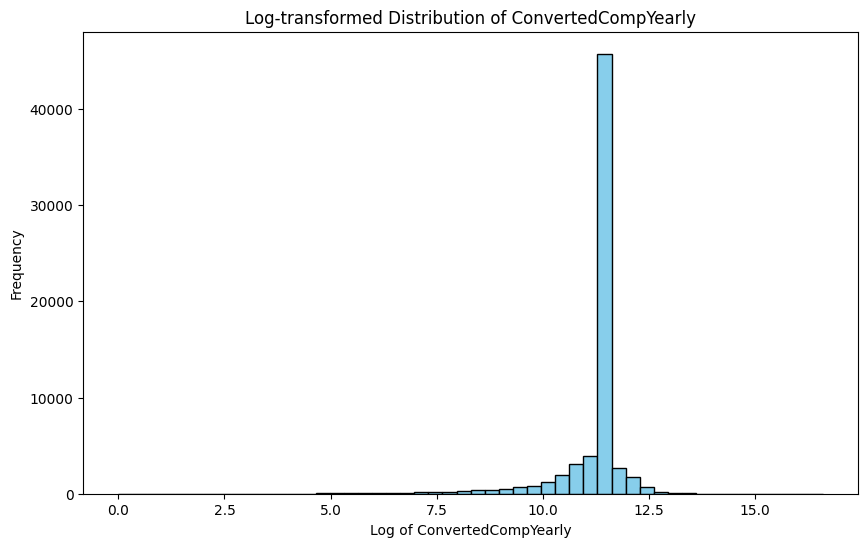

In [35]:
## Write your code here
df['ConvertedCompYearly_Log'] = np.log(df['ConvertedCompYearly'])
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].head())

# check distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly_Log'], bins=50, color='skyblue', edgecolor='black')
plt.title('Log-transformed Distribution of ConvertedCompYearly')
plt.xlabel('Log of ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [37]:
## Write your code here
unique_values = df['YearsCodePro'].unique()
print(unique_values)

df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than one year': 0, 'More than 50 years': 51}) 
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce') 
def categorise_experience(years): 
    if years < 2:
        return 'Beginner' 
    elif 2 <= years < 5: 
        return 'Intermediate'
    elif 5 <= years < 10:
        return 'Advanced'
    elif years >= 10:
        return 'Expert'
    else:
        return 'Unknown'
        

['2' '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33'
 '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44'
 '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
